#Data import


In [1]:
import numpy as np
import json

Sign language key point

In [2]:
with open('weather-signlang.json', 'r') as f:

    json_data = json.load(f)

print(json.dumps(json_data))

{"left_shoulder": {"x": {"0": 0.7184453010559082, "1": 0.7142194509506226, "2": 0.70936119556427, "3": 0.7124556303024292, "4": 0.7124142646789551, "5": 0.7152702212333679, "6": 0.7162676453590393, "7": 0.7185047268867493, "8": 0.7035893201828003, "9": 0.7120887041091919, "10": 0.710988461971283, "11": 0.708748996257782, "12": 0.7073942422866821, "13": 0.7100905776023865, "14": 0.7109646797180176, "15": 0.7093557715415955, "16": 0.7022827863693237, "17": 0.6913323998451233, "18": 0.6878453493118286, "19": 0.7165511250495911, "20": 0.6948557496070862, "21": 0.6945738792419434, "22": 0.69600510597229, "23": 0.7051442265510559, "24": 0.7065668702125549, "25": 0.7124466300010681, "26": 0.7125073671340942, "27": 0.7109038829803467, "28": 0.7109862565994263, "29": 0.7063172459602356, "30": 0.706015944480896, "31": 0.7003346681594849, "32": 0.7064855098724365, "33": 0.7016544342041016, "34": 0.6945659518241882, "35": 0.6911059617996216, "36": 0.6899247169494629, "37": 0.6908249855041504, "38"

In [32]:
json_data['left_elbow']['x']

{'0': 0.8025689125061035,
 '1': 0.8002510070800781,
 '10': 0.7683786749839783,
 '100': 0.8236650824546814,
 '101': 0.8260573148727417,
 '102': 0.8310012817382812,
 '103': 0.8308664560317993,
 '104': 0.7937681674957275,
 '105': 0.7857415676116943,
 '106': 0.79290771484375,
 '107': 0.8105459213256836,
 '108': 0.8255252838134766,
 '109': 0.7855976223945618,
 '11': 0.7904661893844604,
 '110': 0.7925696969032288,
 '111': 0.7991347312927246,
 '112': 0.8173940181732178,
 '113': 0.7945443391799927,
 '114': 0.7571820020675659,
 '115': 0.7787482738494873,
 '116': 0.790273904800415,
 '117': 0.7921808362007141,
 '118': 0.7956594228744507,
 '119': 0.8012785315513611,
 '12': 0.8058786988258362,
 '120': 0.8032986521720886,
 '121': 0.7962320446968079,
 '122': 0.7869200110435486,
 '123': 0.7476997375488281,
 '124': 0.7520506978034973,
 '125': 0.7654759883880615,
 '126': 0.7718013525009155,
 '127': 0.77944415807724,
 '128': 0.8331230878829956,
 '129': 0.833429753780365,
 '13': 0.7963955402374268,
 '130'

Spectogram

In [3]:
from PIL import Image

In [4]:
#rgba_img = Image.open('weather_spectogram_notitle.png')

In [5]:
rgba_img = Image.open('test-weather-2.png')

In [6]:
img = rgba_img.convert('L')

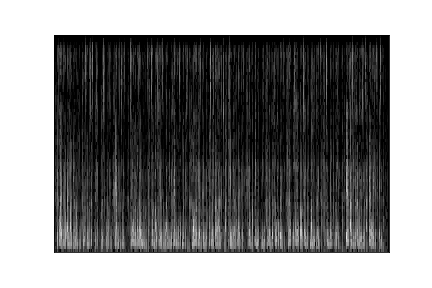

In [7]:
img

In [8]:
import tensorflow as tf

In [9]:
image_array  = tf.keras.preprocessing.image.img_to_array(img)

In [22]:
data = tf.convert_to_tensor(image_array, dtype=tf.float32)

In [23]:
data

<tf.Tensor: shape=(288, 432, 1), dtype=float32, numpy=
array([[[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       ...,

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]]], dtype=float32)>

#Unet model

In [12]:
import tensorflow as tf
import keras

In [13]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, LSTM, Bidirectional, Reshape

In [15]:
IMAGE_WIDTH = 288
IMAGE_HEIGHT = 432
IMAGE_CHANNEL = 1

In [16]:
inputs = Input((IMAGE_WIDTH, IMAGE_HEIGHT,IMAGE_CHANNEL))
s = Lambda(lambda x: x / 255) (inputs)

In [17]:
c1 = Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', kernel_initializer='he_normal', padding='same')(s)
p1 = MaxPooling2D((2,2))(c1)

c2 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c2)

u3 = Conv2DTranspose(filters = 16, kernel_size = (2, 2), strides=(2, 2), padding='same') (c2)
u3 = concatenate([u3, c1], axis=3)
c3 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u3)
c3 = Dropout(0.1) (c3)
c3 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c3)


x = Conv2D(1, (1,1), activation = 'sigmoid')(c3)

In [18]:
x = Reshape((288,432))(x)
x = Bidirectional(LSTM(216, return_sequences=True))(x)
x = Bidirectional(LSTM(216))(x)

x_outputs = Dense(1, name = 'x')(x)
y_outputs = Dense(1, name = 'y')(x)

In [19]:
model = Model(inputs=[inputs], outputs=[x_outputs,y_outputs])

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 288, 432, 1) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 288, 432, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 288, 432, 16) 160         lambda[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 144, 216, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

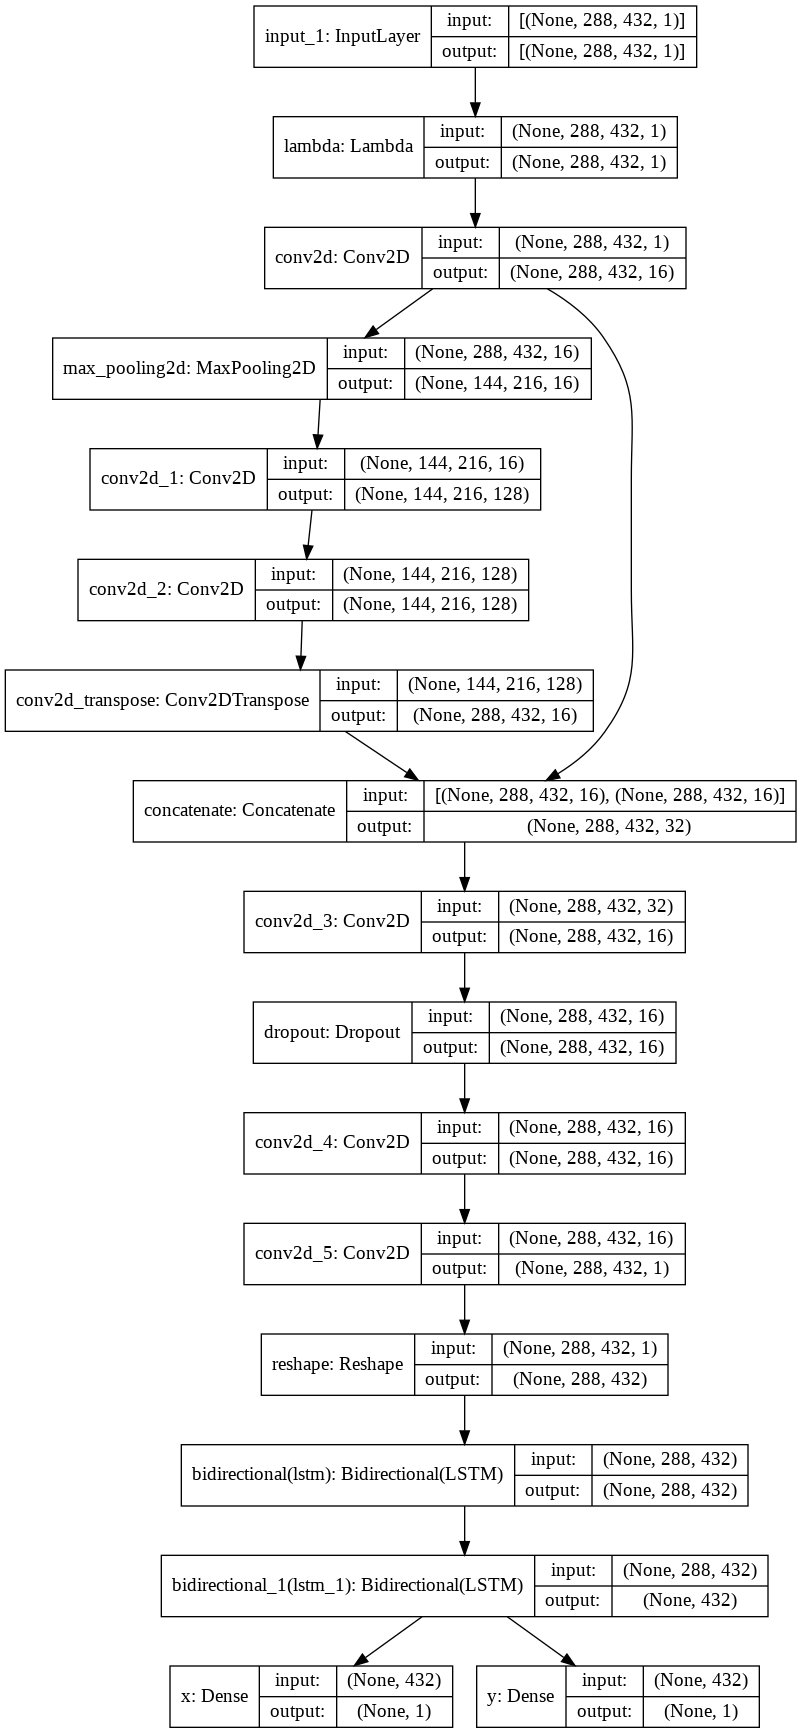

In [21]:
tf.keras.utils.plot_model(model, 'U-net_and_LSTM_model.png', show_shapes=True)

# Train

In [24]:
print(np.shape(data))

(288, 432, 1)


In [25]:
model.compile(optimizer='Adam', # optimizer의 name 혹은 함수 객체 설정
           loss='mse', 
           metrics=['mae'])

In [26]:
num_epochs = 10
batch_size = 100

In [30]:
model.fit(data, json_data, epochs=num_epochs, batch_size = batch_size)

ValueError: ignored